## Get HTML

### Python 2 is needed

With Python 3 use the lib in the following way:

```python
import urllib.request
url = "http://www.google.com/"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
print (response.read().decode('utf-8'))
```






In [4]:
from urllib2 import urlopen
endpoint = "http://www.tigerjython.ch"
endpoint = "http://python.org"
response = urlopen(endpoint)
html = response.read()
print(html)

ModuleNotFoundError: No module named 'urllib2'

## GET HTML mit Encoding

In [ ]:
from urllib2 import urlopen
endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=robotik/lernendeRobot.inc.php"
endpoint = "http://www.tigerjython.ch"
response = urlopen(endpoint)
html = response.read()
encodedhtml = unicode(html, 'iso-8859-1')
#print(html)
print(encodedhtml)

## GET RESPONSE.Headers & HTTP STATUS

In [ ]:
from urllib2 import urlopen

conn = urlopen("http://www.tigerjython.ch")
status = conn.getcode()
reason = conn.msg

print(status,reason)
print(con.headers)

In [ ]:
from urllib2 import urlopen

endpoint = "http://www.tigerjython.ch"
endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=lernumgebung/lernumgebung.inc.php"
endpoint = "http://pdf.tigerjython.ch"

handler = urlopen(endpoint)
headers = handler.headers
code = handler.getcode()
msg = handler.msg
handler.close()

print("HTTP-Status:",code)
print(msg)
print(headers)
print handler.headers['content-type']

## JSON Informationen über github User mgje

In [ ]:
import json
from urllib2 import urlopen

endpoint = "https://api.github.com/users/mgje"
handler = urlopen(endpoint)

j_obj = json.loads(handler.read())

userid = j_obj['login']
name = j_obj['name']
created_at = j_obj['created_at']

print('GitHub user ',userid)
print('Name: ',name)
print('since: ',created_at)

handler.close()


## TigerJython Beispiel

In [ ]:
import urllib2, json

search = "tigerjython+lernen"
url = "http://ajax.googleapis.com/ajax/services/search/web?v=1.0&q=" + search
responseStr = urllib2.urlopen(url).read()
response = json.loads(responseStr)

#print "response:\n" + str(response) + "\n"

responseData = response["responseData"]
#print "reponseData:\n" + str(responseData) + "\n"

results = responseData["results"]
#print "results:\n" + str(results) + "\n"

for result in results:
    title = result["title"]
    url = result["url"]
    print title + " ---- " + url

## HTML Parsen

In [ ]:
from HTMLParser import HTMLParser
from urllib2 import urlopen

# create a subclass and override the handler methods
class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print "Encountered a start tag:", tag
    def handle_endtag(self, tag):
        print "Encountered an end tag :", tag
    def handle_data(self, data):
        print "Encountered some data  :", data


endpoint = "http://www.tigerjython.ch"
response = urlopen(endpoint)
html = response.read()
print(html)

# instantiate the parser and fed it some HTML
parser = MyHTMLParser()
parser.feed(html)

## more complex Parser

In [ ]:
from HTMLParser import HTMLParser
from htmlentitydefs import name2codepoint
from urllib2 import urlopen

class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print "Start tag:", tag
        for attr in attrs:
            print "     attr:", attr
    def handle_endtag(self, tag):
        print "End tag  :", tag
    def handle_data(self, data):
        print "Data     :", data
    def handle_comment(self, data):
        print "Comment  :", data
    def handle_entityref(self, name):
        c = unichr(name2codepoint[name])
        print "Named ent:", c
    def handle_charref(self, name):
        if name.startswith('x'):
            c = unichr(int(name[1:], 16))
        else:
            c = unichr(int(name))
        print "Num ent  :", c
    def handle_decl(self, data):
        print "Decl     :", data

        
endpoint = "http://www.tigerjython.ch"
response = urlopen(endpoint)
html = response.read()
print(html)

parser = MyHTMLParser()
parser.feed(html)

## Nach bestimmten Inhalten Parsen
        

In [ ]:
from HTMLParser import HTMLParser


class AllLanguages(HTMLParser):
    def __init__(self):
        HTMLParser.__init__(self)
        self.inLink = False
        self.dataArray = []
        self.countLanguages = 0
        self.lasttag = None
        self.lastname = None
        self.lastvalue = None

    def handle_starttag(self, tag, attrs):
        self.inLink = False
        if tag == 'a':
            for name, value in attrs:
                if name == 'class' and value == 'Vocabulary':
                    self.countLanguages += 1
                    self.inLink = True
                    self.lasttag = tag

    def handle_endtag(self, tag):
        if tag == "a":
            self.inlink = False

    def handle_data(self, data):
        if self.lasttag == 'a' and self.inLink and data.strip():
            print data


parser = AllLanguages()
parser.feed("""
<html>
<head><title>Test</title></head>
<body>
<a href="http://wold.livingsources.org/vocabulary/1" title="Swahili" class="Vocabulary">Swahili</a>
<a href="http://wold.livingsources.org/contributor#schadebergthilo" title="Thilo Schadeberg" class="Contributor">Thilo Schadeberg</a>
<a href="http://wold.livingsources.org/vocabulary/2" title="English" class="Vocabulary">English</a>
<a href="http://wold.livingsources.org/vocabulary/2" title="Russian" class="Vocabulary">Russian</a>
</body>
</html>""")

## Common Parser Example

In [ ]:
def dodo(v):
    b = 33
    if v == 2:
        c = 4
        d = 8
    print vars()

  
dodo(1)
dodo(2)

attrs =[['href','www'],['blbla','dada']]

tloc = map(lambda x: 1 if x[0]=='href' else 0,attrs)
attr_loc = tloc.index(1)
print tloc
print attr_loc

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

print bcolors.WARNING + "Warning: No active frommets remain. Continue?" + bcolors.ENDC

CSI="\x1B["

print CSI+"30;45m" + "Colored Text" + CSI + "0m"

In [ ]:
from HTMLParser import HTMLParser
from urllib2 import urlopen

class MyParse(HTMLParser):
    def __init__(self):
        #super() does not work for this class
        HTMLParser.__init__(self)
        self.tag_stack = []
        self.attr_stack = []

    def handle_endtag(self, tag):
        #take the tag off the stack if it matches the next close tag
        #if you are expecting unmatched tags, then this needs to be more robust
        if self.tag_stack[len(self.tag_stack)-1][0] == tag:
            self.tag_stack.pop()

    def handle_data(self, data):
        #'data' is the text between tags, not necessarily
        #matching tags
        #this gives you a link to the last tag
        if len(self.tag_stack) > 0:
            tstack = self.tag_stack[len(self.tag_stack)-1]
        else:
            tstack = 0
            
        print(tstack,data)
        #do something with the text
            
    def handle_starttag(self, tag, attrs):
        #add tag to the stack
        self.tag_stack.append([tag, attrs])
        #if this tag is a link
        if tag =="a":
            #these next few lines find if there is a hyperlink in the tag
            tloc = map(lambda x: 1 if x[0]=='href' else 0,attrs)
            try:
                #did we find any hyperlinks
                attr_loc = tloc.index(1)
            except:
                pass
            # attr_loc only exists if we found a hyperlink
            if vars().has_key('attr_loc'):
                #append to the last item in the stack the location of the hyperlink
                #note, this does not increase the length of the stack
                #as we are putting it inside the last item on the stack
                self.tag_stack[len(self.tag_stack)-1].append(attr_loc)

endpoint = "http://curioussystem.com"
response = urlopen(endpoint)
html = response.read()
#print(html)
                
p = MyParse()
p.feed(html)  

## Link Parser

In [ ]:
from HTMLParser import HTMLParser
from urllib2 import urlopen


class LinksExtractor(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.links = []        # create an empty list for storing hyperlinks

    def handle_starttag(self, tag, attrs):
        if tag != 'a':
            return
        else:
            if len(attrs) > 0 :
                for attr in attrs :
                    if attr[0] == "href" :         # ignore all non HREF attributes
                        self.links.append(attr[1])
            
        
    def get_links(self) :     # return the list of extracted links
        return self.links
    

htmlparser = LinksExtractor() 

endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=internet/search.inc.php"

links = htmlparser.get_links()   # get the hyperlinks list

#Print only external Links
for link in links:
    s = link[:7]
    if s.lower() == 'http://':
        print link + "\n"
    

### Simple httplib request

In [ ]:
"""
from httplib import HTTPConnection
conn = HTTPConnection("www.python.org")
conn.request("GET","/")
res = conn.getresponse()
print res.status, res.reason
conn.close()
"""

from httplib import HTTPConnectionb
conn = HTTPConnection("www.tigerjython.ch")
conn.request("GET","/index.html")
res = conn.getresponse()
print res.status, res.reason
for header in res.getheaders():
    print(header[0]+" : "+header[1])

conn.close()

## Check if externallink works

In [ ]:
from HTMLParser import HTMLParser
from urllib2 import urlopen
from httplib import HTTPConnection, HTTPException
import sys



class LinksExtractor(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.links = []        # create an empty list for storing hyperlinks

    def handle_starttag(self, tag, attrs):
        if tag != 'a':
            return
        else:
            if len(attrs) > 0 :
                for attr in attrs :
                    if attr[0] == "href" :         # ignore all non HREF attributes
                        self.links.append(attr[1])
            
        
    def get_links(self) :     # return the list of extracted links
        return self.links
    

htmlparser = LinksExtractor() 

endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=anhang/links.inc.php"  
#endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=internet/search.inc.php"

response = urlopen(endpoint)
html = response.read()
response.close()

encodedhtml=unicode(html, 'iso-8859-1')
htmlparser.feed(encodedhtml)      # parse the file saving the info about links
htmlparser.close()
links = htmlparser.get_links()   # get the hyperlinks list

# Color String
CSI="\x1B["

#links=["http://www.unibas.ch","http://www.blick.ch","http://www.basel.ch"]

for link in links:
    s = link[:7]
    if s.lower() == 'http://':
        url = link[7:]
        if len(url.split('/'))>1:
            site,path = url.split('/',1)
            path = '/'+path
        else:
            url2 = url.split('/',1)
            site = url2[0]
            path = "/"
            
        conn = HTTPConnection(site,timeout=3)
        try:
            conn.request("HEAD",path)
            res = conn.getresponse()
            conn.close()
            if res.status != 200:
                print CSI+"30;45m" + res.reason + " " + link +  CSI + "0m"+"\n"
            else:
                print CSI+"30;42m" +"OK: "+CSI+"30;42m"+ link + CSI + "0m"+"\n"
        except:
            print  CSI+"30;45m" + "could not connect " + link +   CSI + "0m"+"\n"
        
        sys.stdout.flush()
                
"END"
      

## check URLS with urllib2

In [ ]:
from HTMLParser import HTMLParser
from urllib2 import urlopen
import sys



class LinksExtractor(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.links = []        # create an empty list for storing hyperlinks

    def handle_starttag(self, tag, attrs):
        if tag != 'a':
            return
        else:
            if len(attrs) > 0 :
                for attr in attrs :
                    if attr[0] == "href" :         # ignore all non HREF attributes
                        self.links.append(attr[1])
            
        
    def get_links(self) :     # return the list of extracted links
        return self.links
    

htmlparser = LinksExtractor() 

endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=anhang/links.inc.php"  
#endpoint = "http://www.tigerjython.ch/index.php?inhalt_links=navigation.inc.php&inhalt_mitte=internet/search.inc.php"

response = urlopen(endpoint)
html = response.read()
response.close()

encodedhtml=unicode(html, 'iso-8859-1')
htmlparser.feed(encodedhtml)      # parse the file saving the info about links
htmlparser.close()
links = htmlparser.get_links()   # get the hyperlinks list

# Color String
CSI="\x1B["

#links=["http://www.unibas.ch","http://www.blick.ch","http://www.basel.ch"]

for link in links:
    s = link[:7]
    if s.lower() == 'http://':
        try:
            conn = urlopen(link,timeout=3)
            code = conn.getcode()
            msg = conn.msg
            conn.close()
            if code != 200:
                print CSI+"30;45m" + msg + " " + link +  CSI + "0m"+"\n"
            else:
                print CSI+"30;42m" +"OK: "+CSI+"30;42m"+ link + CSI + "0m"+"\n"
        except:
            print  CSI+"30;45m" + "could not connect " + link +   CSI + "0m"+"\n"
        
        sys.stdout.flush()
                
"END"

## Google search

In [ ]:
import urllib2, json

search = input("Enter a search string(AND-connect with +):")
url = "http://ajax.googleapis.com/ajax/services/search/web?v=1.0&q=" + search
responseStr = urllib2.urlopen(url).read()
response = json.loads(responseStr)

#print "response:\n" + str(response) + "\n"

responseData = response["responseData"]
#print "reponseData:\n" + str(responseData) + "\n"

results = responseData["results"]
#print "results:\n" + str(results) + "\n"

for result in results:
    title = result["title"]
    url = result["url"]
    print title + " ---- " + url

### Close Explicit

In [ ]:
#!/usr/bin/env python

"""Web Crawler/Spider

This module implements a web crawler. This is very _basic_ only
and needs to be extended to do anything usefull with the
traversed pages.
"""

import re
import sys
import time
import math
import urllib2
import urlparse
import optparse
from cgi import escape
from traceback import format_exc
from Queue import Queue, Empty as QueueEmpty

from BeautifulSoup import BeautifulSoup

__version__ = "0.2"
__copyright__ = "CopyRight (C) 2008-2011 by James Mills"
__license__ = "MIT"
__author__ = "James Mills"
__author_email__ = "James Mills, James dot Mills st dotred dot com dot au"

USAGE = "%prog [options] <url>"
VERSION = "%prog v" + __version__

AGENT = "%s/%s" % (__name__, __version__)

class Crawler(object):

    def __init__(self, root, depth, locked=True):
        self.root = root
        self.depth = depth
        self.locked = locked
        self.host = urlparse.urlparse(root)[1]
        self.urls = []
        self.links = 0
        self.followed = 0

    def crawl(self):
        page = Fetcher(self.root)
        page.fetch()
        q = Queue()
        for url in page.urls:
            q.put(url)
        followed = [self.root]

        n = 0

        while True:
            try:
                url = q.get()
            except QueueEmpty:
                break

            n += 1

            if url not in followed:
                try:
                    host = urlparse.urlparse(url)[1]
                    if self.locked and re.match(".*%s" % self.host, host):
                        followed.append(url)
                        self.followed += 1
                        page = Fetcher(url)
                        page.fetch()
                        for i, url in enumerate(page):
                            if url not in self.urls:
                                self.links += 1
                                q.put(url)
                                self.urls.append(url)
                        if n > self.depth and self.depth > 0:
                            break
                except Exception, e:
                    print "ERROR: Can't process url '%s' (%s)" % (url, e)
                    print format_exc()

class Fetcher(object):

    def __init__(self, url):
        self.url = url
        self.urls = []

    def __getitem__(self, x):
        return self.urls[x]

    def _addHeaders(self, request):
        request.add_header("User-Agent", AGENT)

    def open(self):
        url = self.url
        try:
            request = urllib2.Request(url)
            handle = urllib2.build_opener()
        except IOError:
            return None
        return (request, handle)

    def fetch(self):
        request, handle = self.open()
        self._addHeaders(request)
        if handle:
            try:
                content = unicode(handle.open(request).read(), "utf-8",
                        errors="replace")
                soup = BeautifulSoup(content)
                tags = soup('a')
            except urllib2.HTTPError, error:
                if error.code == 404:
                    print >> sys.stderr, "ERROR: %s -> %s" % (error, error.url)
                else:
                    print >> sys.stderr, "ERROR: %s" % error
                tags = []
            except urllib2.URLError, error:
                print >> sys.stderr, "ERROR: %s" % error
                tags = []
            for tag in tags:
                href = tag.get("href")
                if href is not None:
                    url = urlparse.urljoin(self.url, escape(href))
                    if url not in self:
                        self.urls.append(url)

def getLinks(url):
    page = Fetcher(url)
    page.fetch()
    for i, url in enumerate(page):
        print "%d. %s" % (i, url)

def parse_options():
    """parse_options() -> opts, args

    Parse any command-line options given returning both
    the parsed options and arguments.
    """

    parser = optparse.OptionParser(usage=USAGE, version=VERSION)

    parser.add_option("-q", "--quiet",
            action="store_true", default=False, dest="quiet",
            help="Enable quiet mode")

    parser.add_option("-l", "--links",
            action="store_true", default=False, dest="links",
            help="Get links for specified url only")

    parser.add_option("-d", "--depth",
            action="store", type="int", default=30, dest="depth",
            help="Maximum depth to traverse")

    opts, args = parser.parse_args()

    if len(args) < 1:
        parser.print_help()
        raise SystemExit, 1

    return opts, args

def main():
    opts, args = parse_options()

    url = args[0]

    if opts.links:
        getLinks(url)
        raise SystemExit, 0

    depth = opts.depth

    sTime = time.time()

    print "Crawling %s (Max Depth: %d)" % (url, depth)
    crawler = Crawler(url, depth)
    crawler.crawl()
    print "\n".join(crawler.urls)

    eTime = time.time()
    tTime = eTime - sTime

    print "Found:    %d" % crawler.links
    print "Followed: %d" % crawler.followed
    print "Stats:    (%d/s after %0.2fs)" % (
            int(math.ceil(float(crawler.links) / tTime)), tTime)

if __name__ == "__main__":
    main()

In [ ]:
from urllib2 import urlopen, URLError

fdurl = urlopen("http://www.unibas.ch",timeout=2)
#realsock = fdurl.fp._sock.fp._sock* # we want to close the "real" socket later
realsock = fdurl.fp
#req = Request(url, header)
print dir(realsock)
print realsock.__doc__
print realsock.closed
realsock.close()
print realsock.closed
try:
    fdurl = urllib2.urlopen("http://www.tigerjython.ch",timeout=2)
    print fdurl.read()
except urllib2.URLError,e:
    print "urlopen exception", e
    realsock.close() 
    fdurl.close()
    

In [ ]:
import time
import threading
import Queue
import urllib2

# utility - spawn a thread to execute target for each args
def run_parallel_in_threads(target, args_list):
    result = Queue.Queue()
    # wrapper to collect return value in a Queue
    def task_wrapper(*args):
        result.put(target(*args))
    threads = [threading.Thread(target=task_wrapper, args=args) for args in args_list]
    for t in threads:
        t.start()
    for t in threads:
        t.join()
    return result

def dummy_task(n):
    for i in xrange(n):
        time.sleep(0.1)
    return n

# below is the application code
urls = [
    ('http://www.google.com/',),
    ('http://www.lycos.com/',),
    ('http://www.bing.com/',),
    ('http://www.altavista.com/',),
    ('http://achewood.com/',),
]

def fetch(url):
    return urllib2.urlopen(url).read()

q =  run_parallel_in_threads(fetch, urls)



## HTML Parsen mit BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup
import urllib2

response = urllib2.urlopen("http://www.pythonscraping.com/pages/page3.html")
html = response.read()
bsObj = BeautifulSoup(html)

for sibling in bsObj.find("table",{"id":"giftList"}).tr.next_siblings:
    print(sibling) 

In [ ]:
import re

images = bsObj.findAll("img", {"src":re.compile("\.\.\/img\/gifts/img.*\.jpg")})
for image in images: 
    print(image["src"])

### WikiPedia by Random

In [ ]:
import urllib2
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())

def getLinks(articleUrl):
    res = urllib2.urlopen("http://de.wikipedia.org"+articleUrl)
    html = res.read()
    bsObj = BeautifulSoup(html)
    return bsObj.find("div", {"id":"bodyContent"}).findAll("a", href=re.compile("^(/wiki/)((?!:).)*$"))

links = getLinks("/wiki/Basel")
while len(links) > 15:
    newArticle = links[random.randint(0, len(links)-1)].attrs["href"]
    print(newArticle)
    links = getLinks(newArticle)


### get Country

In [ ]:
import json
import urllib2


def getCountry(ipAddress):
    response = urllib2.urlopen("http://freegeoip.net/json/"+ipAddress).read().decode('utf-8')
    responseJson = json.loads(response)
    return responseJson.get("country_code")

print(getCountry("50.78.253.58"))
print(getCountry("131.152.1.1"))

### Wiki History

In [ ]:
import urllib2
import json
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    res = urllib2.urlopen("http://de.wikipedia.org"+articleUrl)
    html = res.read()
    bsObj = BeautifulSoup(html)
    return bsObj.find("div", {"id":"bodyContent"}).findAll("a", 
                     href=re.compile("^(/wiki/)((?!:).)*$"))

def getHistoryIPs(pageUrl):
    #Format of revision history pages is: 
    #http://en.wikipedia.org/w/index.php?title=Title_in_URL&action=history
    pageUrl = pageUrl.replace("/wiki/", "")
    historyUrl = "http://de.wikipedia.org/w/index.php?title="+pageUrl+"&action=history"
    print("history url is: "+historyUrl)
    res = urllib2.urlopen(historyUrl)
    html = res.read()
    bsObj = BeautifulSoup(html)
    #finds only the links with class "mw-anonuserlink" which has IP addresses 
    #instead of usernames
    ipAddresses = bsObj.findAll("a", {"class":"mw-anonuserlink"})
    addressList = set()
    for ipAddress in ipAddresses:
        addressList.add(ipAddress.get_text())
    return addressList


def getCountry(ipAddress):
    try:
        response = urllib2.urlopen("http://freegeoip.net/json/"
                           +ipAddress).read().decode('utf-8')
    except HTTPError:
        return None
    responseJson = json.loads(response)
    return responseJson.get("country_code")
    
links = getLinks("/wiki/Basel")


while(len(links) > 13):
    for link in links:
        print("-------------------") 
        historyIPs = getHistoryIPs(link.attrs["href"])
        for historyIP in historyIPs:
            country = getCountry(historyIP)
            if country is not None:
                print(historyIP+" is from "+country)

    newLink = links[random.randint(0, len(links)-1)].attrs["href"]
    links = getLinks(newLink)

## HTML Parser

In [ ]:
from HTMLParser import HTMLParser

class MyHTMLParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        print("Encountered a start tag:", tag)
    def handle_endtag(self, tag):
        print("Encountered an end tag :", tag)
    def handle_data(self, data):
        print("Encountered some data  :", data)

parser = MyHTMLParser()
parser.feed('<html><head><title>Test</title></head>'
            '<body><h1>Parse me!</h1></body></html>')

In [ ]:
from HTMLParser import HTMLParser
import urllib2



class MyHTMLParser(HTMLParser):
    counter = 0 
    
    def handle_starttag(self, tag, attrs):
        if self.counter <10:
            print("Encountered a start tag:", tag)
            self.counter +=1
    def handle_endtag(self, tag):
        if self.counter <10:
            print("Encountered an end tag :", tag)
            self.counter +=1
    def handle_data(self, data):
        if self.counter <10:
            print("Encountered some data  :", data)
            self.counter +=1

res = urllib2.urlopen("http://www.nzz.ch")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    catch = 0
    catchline = ""
    
    def handle_starttag(self, tag, attrs):
        #print("Encountered a start tag:", tag)
        for attr in attrs:
            #print("Attr", attr)
            #print(attr[1])
            if attr[1] == "title__catchline":
                self.catch = 2
            elif attr[1] == "title__name":
                self.catch = 1
            else:
                self.catch = 0
            
#    def handle_endtag(self, tag):
        #print("Encountered an end tag :", tag)
    
    def handle_data(self, data):
        if self.catch==1:
            print self.catchline+": "+data
            self.catchline = ""
            
        if self.catch==2:
            self.catchline = data

res = urllib2.urlopen("http://www.nzz.ch")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

## Rubriken NZZ

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    rubrik = 0
    catch = 0
    tmp = 0
    
    
    def handle_starttag(self, tag, attrs):
        #print("Encountered a start tag:", tag)
        for attr in attrs:
            #print("Attr", attr)
            #print(attr[1])
            if attr[1]!=None and attr[1].find("container__title ")!=-1 :
                #print("Rubrik")
                self.rubrik += 1
                self.catch = 1
            else:
                #self.catch = 0
                self.tmp=0
    
    def handle_endtag(self, tag):
        if tag == "a" or tag == "div":
            self.catch=0
    
    def handle_data(self, data):
        if self.catch==1:
            if len(data) > 2:
                print(str(self.rubrik)+". "+data)
            

res = urllib2.urlopen("http://www.nzz.ch")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

###Find Last Article

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    newesttime = 0
    title = ""
    tmp = 0
    catch=0
    
    
    def handle_starttag(self, tag, attrs):
        #print("Encountered a start tag:", tag)
        if tag == "div":
            for attr in attrs:
                if attr[1] == "title__name":
                    self.catch = 1
            
        
        if tag == "time":
            for attr in attrs:
            #print("Attr", attr)
            #print(attr[1])
                if attr[1]!=None and attr[0].find("datetime")!=-1 :
                    print attr[1]
                

    
    def handle_endtag(self, tag):
        if tag == "a" or tag == "div":
            self.catch=0
    
    def handle_data(self, data):
        if self.catch==1:
            if len(data) > 2:
                print(data)
            

res = urllib2.urlopen("http://www.nzz.ch")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

## BAZ feature Story

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    rubrik = 0
    catch = 0
    tmp = 0
    
    
    def handle_starttag(self, tag, attrs):
        if tag == "div":
            for attr in attrs:
                if attr[1]!=None and attr[1].find("featureStory")!=-1 :
                    self.rubrik += 1
                    self.catch = 1
                    #print(tag)
                    break
        if tag == "a" and self.catch ==1:
            self.catch =2
    
    def handle_endtag(self, tag):
        if tag == "a":
            self.catch=0
    
    def handle_data(self, data):
        if self.catch==2:
            if len(data) > 1 and data != "  ":
                print(str(self.rubrik)+". "+data)
            

res = urllib2.urlopen("http://bazonline.ch/")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

### Baz Rubriken

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    rubrik = 0
    catch = 0
    tmp = 0
    
    
    def handle_starttag(self, tag, attrs):
        if tag == "div":
            for attr in attrs:
                if attr[1]!=None and attr[1].find("ressortGroup")!=-1 :
                    self.rubrik += 1
                    self.catch = 1
                    #print(tag)
                    break
        if tag == "a" and self.catch ==1:
            self.catch =2
    
    def handle_endtag(self, tag):
        if tag == "a":
            self.catch=0
    
    def handle_data(self, data):
        if self.catch==2:
            if len(data) > 1 and data != "  ":
                print(str(self.rubrik)+". "+data)
            

res = urllib2.urlopen("http://bazonline.ch/")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

###Baz Artikelliste nach Zeit

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class MyHTMLParser(HTMLParser):
    
    rubrik = 0
    catch = 0
    tmp = 0
    storyId = ""
    title = ""
    message = ""
    info =[]
    

    def handle_starttag(self, tag, attrs):
        if tag == "div":
            for attr in attrs:
                if attr[1]!=None and attr[1].find("articleStory_")!=-1 :
                    self.storyId=attr[1]
                    self.rubrik += 1
                    self.info.append(self.rubrik)
                    self.info.append(attr[1])
                    self.catch = 1
                    #print(tag)
                    break
                    
        if tag == "a" and self.catch ==1:
            self.catch = 2
        
        if tag =="h5" and self.catch == 3:
            self.catch = 4
        if tag =="em" and self.catch == 4:
            self.catch = 5
        if tag =="span" and self.catch == 5:
            self.catch = 7
    
    def handle_endtag(self, tag):
        if tag == "a":
            self.catch=3
            
        if tag == "em" and self.catch == 5 or self.catch == 6:
            self.catch=0
            self.info=[]
    
    def handle_data(self, data):
        if self.catch == 2:
            if len(data) > 1 and data != "  ":
                self.title=data
                #self.info.append(self.storyId)
                self.info.append(data)
        elif self.catch == 5:
            if data.find("\t\t\t\t") == -1 and data != " ":
                self.message = str(self.rubrik)+". "+self.storyId+":"+self.title+", "+data
                self.info.append(data)
                print self.info
        elif self.catch == 7:
            self.info.append(data)
            print data
            print("catched")
            

res = urllib2.urlopen("http://bazonline.ch/")        
encoding = res.headers.getparam('charset')
html = res.read().decode(encoding)             
parser = MyHTMLParser()
parser.feed(html)

## Titel des ersten Artikel aus der Rubrik digital von 20 Minuten

In [ ]:
from HTMLParser import HTMLParser
import urllib2

class DigitalHeadLine(HTMLParser):
    
    capture_txt=False
    headlines =[]
    

    def handle_starttag(self, tag, attrs):
        if tag == "h2":
            if "data-vr-contentbox" in dict(attrs):
                self.capture_txt=True
        return      
        
    
    def handle_endtag(self, tag):
        if tag == "h2":
             if self.capture_txt == True:
                self.capture_txt=False
        return
    
    def handle_data(self, data):
        if self.capture_txt == True:
            self.headlines.append(data)
        return
    
    def getheadlines(self):
        print self.headlines[0]
            
            
url="http://www.20min.ch/digital/"
res = urllib2.urlopen(url)        
encoding = "iso-8859-1"
html = res.read().decode(encoding)   
parser = DigitalHeadLine()
parser.feed(html)
parser.getheadlines()


In [ ]:
attrs =[('blim','sim'),('wum','chum')]
d = dict(attrs)
print d


### GeoCoder Example


In [ ]:
import requests
url = 'https://maps.googleapis.com/maps/api/geocode/json'
params = {'sensor': 'false', 'address': 'Mountain View, CA'}
r = requests.get(url, params=params)
results = r.json()['results']
location = results[0]['geometry']['location']
location['lat'], location['lng']


In [ ]:
import urllib2
import pprint
import json
add = "Universitätstrasse 6 ETH Zürich"
add = urllib2.quote(add)
geocode_url = "http://maps.googleapis.com/maps/api/geocode/json?address=%s&sensor=false&region=uk" % add
print geocode_url
req = urllib2.urlopen(geocode_url)
jsonResponse = json.loads(req.read())
pprint.pprint(jsonResponse) 

In [ ]:
import urllib2
import pprint
import json
add = "Universitätstrasse 6 ETH Zürich"
add = urllib2.quote(add)
print add
geocode_url = "http://maps.googleapis.com/maps/api/geocode/json?address=%s&sensor=false" % add
print geocode_url
req = urllib2.urlopen(geocode_url)
jsonResponse = json.loads(req.read())
pprint.pprint(jsonResponse) 

Weg in den Zoo

In [ ]:
import urllib2
import pprint
import json
import re

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


start = "Universitätstrasse 6 ETH Zürich"
ziel = "Zoo Zürich"
sprache = "de" # "en"
art = "walking" #driving walking transit bicycling
#start = urllib2.quote(start.encode('utf-8'))
#ziel = urllib2.quote(ziel.encode('utf-8'))
start = urllib2.quote(start)
ziel = urllib2.quote(ziel)
geocode_url = "https://maps.googleapis.com/maps/api/directions/json?origin=%s&destination=%s&avoid=highways&mode=%s&language=%s" % (start,ziel,art,sprache)
req = urllib2.urlopen(geocode_url)
jsonResponse = json.loads(req.read())

print "Distanz:" + jsonResponse['routes'][0]['legs'][0]['distance']['text']
print "Dauer:" + jsonResponse['routes'][0]['legs'][0]['duration']['text']

for step in jsonResponse['routes'][0]['legs'][0]['steps']:
    print step['distance']['text'] + " > "+ remove_tags(step['html_instructions'])


wolfram test

http://api.wolframalpha.com/v2/query?appid=xxx&input=weather%20tomorrow%20in%20zurich&format=html


## 






## Kommentarstruktur eines Zeitungsartikels


In [28]:
s="mist wurst"
"mist" in s


True

In [6]:
from urllib2 import urlopen
import pprint
from HTMLParser import HTMLParser

def get_comment_par(attrs):
    d = {}
    for attr in attrs:
        if attr[0] == 'id':
            tmp = attr[1].split('_')
            d['thread'] = tmp[0][6:]
            d['msg'] = tmp[1][3:]
        if attr[0] == "data-voteup" or attr[0] == "data-votedown":
            d[attr[0]] = attr[1]
    return d


class LinksExtractor(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.comments = []        # create an empty list for storing hyperlinks
        self.insidecomment = False
        self.intitle = False
        self.inauthor = False
        self.intime = False
        self.incontent = False
        self.inentry = False
        self.inreplies = False
        self.info = None
        self.title = ""
        self.content = ""
        self.author =""
        self.time = ""
        self.comment = None 
        self.replies = None
        self.divlevel = 0
        self.lilevel = 0
        

    def handle_starttag(self, tag, attrs):
        if tag == 'li':
            self.lilevel += 1
            for attr in attrs:
                if attr[0] == 'class':
                    if attr[1] == 'comment':
                        self.insidecomment = True
                        self.comment = {}
                        self.info = get_comment_par(attrs)
                        
        elif tag == 'h3':
            for attr in attrs:
                if attr[0] == 'class':
                    if attr[1] == 'title':
                        self.intitle = True
        elif tag == 'span':
            for attr in attrs:
                if attr[0] == 'class':
                    if attr[1] == 'author':
                        self.inauthor = True
                    elif attr[1] == 'time': 
                        self.intime = True
        elif tag == 'p':
            for attr in attrs:
                if attr[0] == 'class':
                    if attr[1] == 'content':
                        self.incontent = True
        elif tag == 'div':
            self.divlevel += 1
            for attr in attrs:
                if attr[0] == 'class':
                    if attr[1] == 'entry':
                        self.inentry = True
                    elif 'replies' in attr[1]:
                        self.replies =[]
                        self.inreplies = True
                        self.inentry = False
                        
            
            
    def handle_endtag(self, tag):
        if tag == 'li':
            self.lilevel -= 1
            if self.lilevel == 0:
                if self.insidecomment:
                    print "add comment"
                    self.comments.append(self.comment)
                self.insidecomment = False
        elif tag == 'h3':
            self.intitle = False
        elif tag == 'span':
            self.intime = False
            self.inauthor = False
        elif tag == 'p':
            # collect all comment information
            
            if self.incontent:
                if self.inentry:
                    print "collect comment, aut: "+self.author
                    self.comment['info'] = self.info
                    self.info = {}
                    self.comment['author'] = self.author
                    self.comment['time'] = self.time
                    self.comment['title'] = self.title
                    self.comment['content'] = self.content
                    
                if self.inreplies:
                    print "save reply: autor: "+self.author
                    col ={}
                    col['info'] = self.info
                    self.info = {}
                    col['author'] = self.author
                    col['time'] = self.time
                    col['title'] = self.title
                    col['content'] = self.content
                    self.replies.append(col)
            self.incontent = False
        elif tag == 'div':
            self.divlevel -= 1
            if self.divlevel == 0:
                if self.inreplies:
                    print "add replies"
                    self.comment['reply'] = self.replies
                self.inentry = False
                self.inreplies = False
        return
        
    def handle_data(self, data):
        if self.intitle:
            self.title = data
        elif self.inauthor:
            self.author = data
        elif self.intime:
            self.time = data
        elif self.incontent:
            self.content = data
        return
    
    def get_comments(self) :     # return the list of extracted links
        return self.comments



zeitung = 'http://www.20min.ch';
rubriken = ['schweiz'];

storyid = '18530412'
kommentare = zeitung + '/community/storydiscussion/messageoverview.tmpl?storyid=' + storyid
print kommentare

response = urlopen(kommentare,timeout=3)
html = response.read()
#pprint.pprint(html)


p = LinksExtractor()
p.feed(html) 
pprint.pprint(p.get_comments())

http://www.20min.ch/community/storydiscussion/messageoverview.tmpl?storyid=18530412
collect comment, aut: shady
add comment
collect comment, aut: Grunz
collect comment, aut: Bubbl
save reply: autor: Bubbl
add replies
add comment
collect comment, aut: Sabi
collect comment, aut: Cara
save reply: autor: Cara
add replies
add comment
collect comment, aut: JW Goethe 
collect comment, aut: Der Boi
save reply: autor: Der Boi
add replies
add comment
[{'author': 'shady',
  'content': ' Achja die Medien mal wieder. Der Film l\xc3\xa4uft nicht so gut wie geplant und man sieht Cara mal im Ausgang trinken. Ergo hat sie jetzt ein Alkoholproblem. ',
  'info': {'data-votedown': '4',
           'data-voteup': '83',
           'msg': '8',
           'thread': '8'},
  'time': 'am 31.08.2015 01:14',
  'title': 'So ein Quatsch'},
 {'author': 'Bubbl',
  'content': ' Bin ganz deiner Meinung! ',
  'info': {'data-votedown': '1',
           'data-voteup': '26',
           'msg': '22',
           'thread': '6'},


Better Parsing

In [22]:
from urllib2 import urlopen
import pprint
from HTMLParser import HTMLParser
import json

def taghasattr(key,value,attrs):
    for attr in attrs:
        if attr[0] == key:
            if value in attr[1]:
                return True
    return False

def get_comment_par(attrs):
    d = {}
    for attr in attrs:
        if attr[0] == 'id':
            tmp = attr[1].split('_')
            d['thread'] = tmp[0][6:]
            d['msg'] = tmp[1][3:]
        if attr[0] == "data-voteup" or attr[0] == "data-votedown":
            d[attr[0]] = attr[1]
    return d


class LinksExtractor(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.comments = []        # create an empty list for storing hyperlinks
        self.insidecomment = False
        self.inreplies = False
        self.inentry = False
        self.position = "start"
        self.info = None
        self.commentinfo = None
        self.title = ""
        self.content = ""
        self.author =""
        self.time = ""
        self.comment = None 
        self.replies = None
        self.divlevel = 0
        self.lilevel = 0
        
        
    def handle_starttag(self, tag, attrs): 
        if tag == 'li':
            self.lilevel += 1
            if taghasattr('class','comment',attrs):
                if self.lilevel == 1:
                    self.insidecomment = True
                    self.comment = {}
                    self.info = get_comment_par(attrs)
                elif self.lilevel == 2:
                    self.commentinfo = get_comment_par(attrs)
                        
        elif tag == 'h3':
            if taghasattr('class','title',attrs):
                self.position = 'title'
        elif tag == 'span':
            if taghasattr('class','author',attrs):
                self.position = 'author'
            elif taghasattr('class','time',attrs):
                self.position = 'time'
        
        elif tag == 'p':
            if taghasattr('class','content',attrs):
                self.position = 'content'
        elif tag == 'div':
            self.divlevel += 1
            if taghasattr('class','entry',attrs) and self.divlevel == 1:
                self.inentry = True
            elif taghasattr('class','replies',attrs):
                self.replies =[]
                self.inreplies = True
                    
    def handle_endtag(self, tag):
        if tag == 'li':
            self.lilevel -= 1
            if self.lilevel == 0:
                if self.insidecomment:
                    self.comments.append(self.comment)
                self.insidecomment = False
        elif tag == 'h3':
            self.position = 'out'
        elif tag == 'span':
            self.position = 'out'
            self.position = 'out'
        elif tag == 'p':
            if self.position == 'content':
                col ={}
                col['author'] = self.author
                col['time'] = self.time
                col['title'] = self.title
                col['content'] = self.content
                if self.inentry:
                    col['info'] = self.info
                    self.comment = col
                if self.inreplies:
                    col['replyinfo'] = self.commentinfo
                    self.replies.append(col)
                self.position = 'out'
                
        elif tag == 'div':
            self.divlevel -= 1
            if self.divlevel == 0:
                if self.inreplies:
                    self.comment['reply'] = self.replies
                self.inentry = False
                self.inreplies = False
        return
        
    def handle_data(self, data):
        if self.position == 'title':
            self.title = data
        elif self.position == 'author':
            self.author = data
        elif self.position == 'time':
            self.time = data
        elif self.position == 'content':
            self.content = data
        return
    
    def get_comments(self) :     # return the list of extracted links
        return self.comments

zeitung = 'http://www.20min.ch';
rubriken = ['schweiz'];

storyid = '18530412'
kommentare = zeitung + '/community/storydiscussion/messageoverview.tmpl?storyid=' + storyid


response = urlopen(kommentare,timeout=3)
html = response.read()



p = LinksExtractor()
p.feed(html) 

comments_s = p.get_comments()
#pprint.pprint(comments_s)
out_file = open("20min.json","w")

# Save the dictionary into this file
# (the 'indent=4' is optional, but makes it more readable)
json.dump(comments_s,out_file, indent=4)                                    

# Close the file
out_file.close()

import json
import pprint

in_file = open("20min.json","r")
article_comments = json.load(in_file)
in_file.close()

## pprint.pprint(jsonartikel)

def count_comment_entries(cm):
    count = 0
    for entry in cm:
        count += 1
    return count


def count_all_entries(cm):
    count = 0
    for entry in cm:
        count += 1
        if 'reply' in entry:
            for reply in entry['reply']:
                count += 1
    return count

def author_hist(cm):
    d = {}
    for entry in cm:
        if entry['author'] in d:
            d[entry['author']] +=1
        else:
            d[entry['author']] =1
            
        if 'reply' in entry:
            for reply in entry['reply']:
                if entry['author'] in d:
                    d[entry['author']] +=1
                else:
                    d[entry['author']] =1
    return d
    
    
def reply_hist(cm):
    d = []
    for entry in cm:
        count = 0
        if 'reply' in entry:
            for rep in entry['reply']:
                count += 1
        d.append(count)
    return d

def vote_hist(cm):
    vup = []
    vdown = []
    for entry in cm:
        up = int(entry['info']['data-voteup'])
        down = int(entry['info']['data-votedown'])
        vup.append(up)
        vdown.append(down)
    return vup,vdown
    

def nr_of_authors(cm):
    return len(author_hist(cm))

def author_with_max_comments(cm):
    hist = author_hist(cm)
    return max(hist,key=hist.get)

def get_max_nr_per_author(cm):
    hist = author_hist(cm)
    return hist[max(hist,key=hist.get)]

def max_replies(cm):
    return max(reply_hist(cm))

def max_vote_up_down(cm):
    vu,vd = vote_hist(cm)
    return max(vu),max(vd)

"""
print count_all_entries(article_comments)
print author_hist(article_comments)
print nr_of_authors(article_comments)
print author_with_max_comments(article_comments)
print get_max_nr_per_author(article_comments)
print count_comment_entries(article_comments)
print reply_hist(article_comments)
print max_replies(article_comments)
vu,vd = vote_hist(article_comments)
print vu
print vd
print max_vote_up_down(article_comments)
"""
print "Artikel-Fingerprint"
print "Artikel ID: %s"%"xxxx"
print "Anzahl Kommentare und Antworten: %d"% count_all_entries(article_comments)
print "Anzahl Kommentare: %d"% count_comment_entries(article_comments)
print "Anzahl verschiedener Autoren: %d" % nr_of_authors(article_comments)
print "Max Beiträge eines Autors: %d" % get_max_nr_per_author(article_comments)
print "Max Rückmeldungen auf einen Kommentar: %d" % max_replies(article_comments)
vu,vd = max_vote_up_down(article_comments)
print "Max Upvotes eines Kommentars: %d" % vu
print "Max Downvostes eines Kommentars: %d" % vd

## Artikel Charakterisierung

In [10]:
from urllib2 import urlopen
import pprint
from HTMLParser import HTMLParser
import json

def taghasattr(key,value,attrs):
    for attr in attrs:
        if attr[0] == key:
            if value in attr[1]:
                return True
    return False

def get_comment_par(attrs):
    d = {}
    for attr in attrs:
        if attr[0] == 'id':
            tmp = attr[1].split('_')
            d['thread'] = tmp[0][6:]
            d['msg'] = tmp[1][3:]
        if attr[0] == "data-voteup" or attr[0] == "data-votedown":
            d[attr[0]] = attr[1]
    return d


class ArticleParser(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.comments = []        # create an empty list for storing hyperlinks
        self.insidecomment = False
        self.inreplies = False
        self.inentry = False
        self.instroytitle = False
        self.position = "start"
        self.info = None
        self.commentinfo = None
        self.title = ""
        self.content = ""
        self.author =""
        self.time = ""
        self.storytitle = ""
        self.comment = None 
        self.replies = None
        self.divlevel = 0
        self.lilevel = 0
        
        
    def handle_starttag(self, tag, attrs): 
        if tag == 'li':
            self.lilevel += 1
            if taghasattr('class','comment',attrs):
                if self.lilevel == 1:
                    self.insidecomment = True
                    self.comment = {}
                    self.info = get_comment_par(attrs)
                elif self.lilevel == 2:
                    self.commentinfo = get_comment_par(attrs)
                        
        elif tag == 'h3':
            if taghasattr('class','title',attrs):
                self.position = 'title'
        elif tag == 'span':
            if taghasattr('class','author',attrs):
                self.position = 'author'
            elif taghasattr('class','time',attrs):
                self.position = 'time'
            elif self.instroytitle:
                self.position = 'storytitle'
        
        elif tag == 'p':
            if taghasattr('class','content',attrs):
                self.position = 'content'
        elif tag == 'div':
            self.divlevel += 1
            if taghasattr('class','entry',attrs) and self.divlevel == 1:
                self.inentry = True
            elif taghasattr('class','replies',attrs):
                self.replies =[]
                self.inreplies = True
            elif taghasattr('class','story_titles',attrs):
                self.instroytitle = True
                    
    def handle_endtag(self, tag):
        if tag == 'li':
            self.lilevel -= 1
            if self.lilevel == 0:
                if self.insidecomment:
                    self.comments.append(self.comment)
                self.insidecomment = False
        elif tag == 'h3':
            self.position = 'out'
        elif tag == 'span':
            self.position = 'out'
            self.position = 'out'
        elif tag == 'p':
            if self.position == 'content':
                col ={}
                col['author'] = self.author
                col['time'] = self.time
                col['title'] = self.title
                col['content'] = self.content
                if self.inentry:
                    col['info'] = self.info
                    self.comment = col
                if self.inreplies:
                    col['replyinfo'] = self.commentinfo
                    self.replies.append(col)
                self.position = 'out'
                
        elif tag == 'div':
            self.divlevel -= 1
            if self.divlevel == 0:
                if self.inreplies:
                    self.comment['reply'] = self.replies
                self.inentry = False
                self.inreplies = False
            elif self.divlevel < 7 and self.instroytitle:
                self.instroytitle = False
        return
        
    def handle_data(self, data):
        if self.position == 'title':
            self.title = data
        elif self.position == 'author':
            self.author = data
        elif self.position == 'time':
            self.time = data
        elif self.position == 'content':
            self.content = data
        elif self.position == 'storytitle':
            self.storytitle = data
        return
    
    def get_comments(self) :     # return the list of extracted links
        return self.comments
    
    def get_storytitle(self):
        return self.storytitle

zeitung = 'http://www.20min.ch';
#rubriken = ['schweiz'];

### Rubrik Schweiz
storyid = '18322505'
kommentare = zeitung + '/community/storydiscussion/messageoverview.tmpl?storyid=' + storyid
story = zeitung + '/schweiz/news/story/' + storyid


# Titel des Artikels zur Storyid
response = urlopen(story,timeout=3)
html = response.read()
# Parse
p = ArticleParser()
p.feed(html)
storytitle = p.get_storytitle()


### Kommentare anschauen
response = urlopen(kommentare,timeout=3)
html = response.read()


# Parse
p = ArticleParser()
p.feed(html) 

# Article Dictionary / JSON
article_comments = p.get_comments()

def count_comment_entries(cm):
    count = 0
    for entry in cm:
        count += 1
    return count


def count_all_entries(cm):
    count = 0
    for entry in cm:
        count += 1
        if 'reply' in entry:
            for reply in entry['reply']:
                count += 1
    return count

def author_hist(cm):
    d = {}
    for entry in cm:
        if entry['author'] in d:
            d[entry['author']] +=1
        else:
            d[entry['author']] =1
            
        if 'reply' in entry:
            for reply in entry['reply']:
                if entry['author'] in d:
                    d[entry['author']] +=1
                else:
                    d[entry['author']] =1
    return d
    
    
def reply_hist(cm):
    d = []
    for entry in cm:
        count = 0
        if 'reply' in entry:
            for rep in entry['reply']:
                count += 1
        d.append(count)
    return d

def vote_hist(cm):
    vup = []
    vdown = []
    for entry in cm:
        up = int(entry['info']['data-voteup'])
        down = int(entry['info']['data-votedown'])
        vup.append(up)
        vdown.append(down)
    return vup,vdown
    

def nr_of_authors(cm):
    return len(author_hist(cm))

def author_with_max_comments(cm):
    hist = author_hist(cm)
    return max(hist,key=hist.get)

def get_max_nr_per_author(cm):
    hist = author_hist(cm)
    return hist[max(hist,key=hist.get)]

def max_replies(cm):
    return max(reply_hist(cm))

def max_vote_up_down(cm):
    vu,vd = vote_hist(cm)
    return max(vu),max(vd)


print "Artikel-Fingerprint"
print "Titel: %s"%storytitle
print "Artikel ID: %s"%storyid
print "URL: %s"%story
print "Anzahl Kommentare und Antworten: %d"% count_all_entries(article_comments)
print "Anzahl Kommentare: %d"% count_comment_entries(article_comments)
print "Anzahl verschiedener Autoren: %d" % nr_of_authors(article_comments)
print "Max Beiträge eines Autors: %d" % get_max_nr_per_author(article_comments)
print "Max Rückmeldungen auf einen Kommentar: %d" % max_replies(article_comments)
vu,vd = max_vote_up_down(article_comments)
print "Max Up_Votes eines Kommentars: %d" % vu
print "Max Down_Votes eines Kommentars: %d" % vd



Artikel-Fingerprint
Titel: Die Leser nehmen Abschied vom Sommer
Artikel ID: 18322505
URL: http://www.20min.ch/schweiz/news/story/18322505
Anzahl Kommentare und Antworten: 157
Anzahl Kommentare: 113
Anzahl verschiedener Autoren: 111
Max Beiträge eines Autors: 4
Max Rückmeldungen auf einen Kommentar: 3
Max Up_Votes eines Kommentars: 373
Max Down_Votes eines Kommentars: 131


In [6]:
from urllib2 import urlopen
import pprint
from HTMLParser import HTMLParser
import json

def taghasattr(key,value,attrs):
    for attr in attrs:
        if attr[0] == key:
            if value in attr[1]:
                return True
    return False

def get_comment_par(attrs):
    d = {}
    for attr in attrs:
        if attr[0] == 'id':
            tmp = attr[1].split('_')
            d['thread'] = tmp[0][6:]
            d['msg'] = tmp[1][3:]
        if attr[0] == "data-voteup" or attr[0] == "data-votedown":
            d[attr[0]] = attr[1]
    return d


class ArticleParser(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.comments = []        # create an empty list for storing hyperlinks
        self.insidecomment = False
        self.inreplies = False
        self.inentry = False
        self.instroytitle = False
        self.position = "start"
        self.info = None
        self.commentinfo = None
        self.title = ""
        self.content = ""
        self.author =""
        self.time = ""
        self.storytitle = ""
        self.comment = None 
        self.replies = None
        self.divlevel = 0
        self.lilevel = 0
        
        
    def handle_starttag(self, tag, attrs): 
        if tag == 'li':
            self.lilevel += 1
            if taghasattr('class','comment',attrs):
                if self.lilevel == 1:
                    self.insidecomment = True
                    self.comment = {}
                    self.info = get_comment_par(attrs)
                elif self.lilevel == 2:
                    self.commentinfo = get_comment_par(attrs)
                    
                        
        elif tag == 'h3':
            if taghasattr('class','title',attrs):
                self.position = 'title'
        elif tag == 'span':
            if taghasattr('class','author',attrs):
                self.position = 'author'
            elif taghasattr('class','time',attrs):
                self.position = 'time'
            elif self.instroytitle:
                self.position = 'storytitle'
        
        elif tag == 'p':
            if taghasattr('class','content',attrs):
                self.position = 'content'
        elif tag == 'div':
            self.divlevel += 1
            if taghasattr('class','entry',attrs) and self.divlevel < 9:
                self.inentry = True
            elif taghasattr('class','replies',attrs):
                self.replies =[]
                self.inreplies = True
            elif taghasattr('class','story_titles',attrs):
                self.instroytitle = True
                    
    def handle_endtag(self, tag):
        if tag == 'li':
            self.lilevel -= 1
            if self.lilevel == 0:
                if self.insidecomment:
                    self.comments.append(self.comment)
                self.insidecomment = False
        elif tag == 'h3':
            self.position = 'out'
        elif tag == 'span':
            self.position = 'out'
            self.position = 'out'
        elif tag == 'p':
            if self.position == 'content':
                col ={}
                col['author'] = self.author
                col['time'] = self.time
                col['title'] = self.title
                col['content'] = self.content
                if self.inentry:
                    col['info'] = self.info
                    self.comment = col
                if self.inreplies:
                    col['replyinfo'] = self.commentinfo
                    self.replies.append(col)
                self.position = 'out'
                
        elif tag == 'div':
            self.divlevel -= 1
            if self.divlevel < 8 and self.comment != None:
                if self.inreplies:
                    self.comment['reply'] = self.replies
                self.inentry = False
                self.inreplies = False
            elif self.divlevel < 7 and self.instroytitle:
                self.instroytitle = False
        return
        
    def handle_data(self, data):
        if self.position == 'title':
            self.title = data
        elif self.position == 'author':
            self.author = data
        elif self.position == 'time':
            self.time = data
        elif self.position == 'content':
            self.content = data
        elif self.position == 'storytitle':
            self.storytitle = data
        return
    
    def get_comments(self) :     # return the list of extracted links
        return self.comments
    
    def get_storytitle(self):
        return self.storytitle

zeitung = 'http://www.20min.ch';
#rubriken = ['schweiz'];

### Rubrik Schweiz
storyid = '25287962'
storyid = "25774941"
#kommentare = zeitung + '/community/storydiscussion/messageoverview.tmpl?storyid=' + storyid
story = zeitung + '/schweiz/news/story/' + storyid
kommentare = zeitung + '/talkbacks/story/' + storyid
print kommentare

# Titel des Artikels zur Storyid
response = urlopen(story,timeout=3)
html = response.read()
# Parse
p = ArticleParser()
p.feed(html)
storytitle = p.get_storytitle()


### Kommentare anschauen
response = urlopen(kommentare,timeout=3)
html = response.read()


# Parse
p = ArticleParser()
p.feed(html) 

# Article Dictionary / JSON
article_comments = p.get_comments()
#pprint.pprint(article_comments)

def count_comment_entries(cm):
    count = 0
    for entry in cm:
        count += 1
    return count


def count_all_entries(cm):
    count = 0
    for entry in cm:
        count += 1
        if 'reply' in entry:
            for reply in entry['reply']:
                count += 1
    return count

def author_hist(cm):
    d = {}
    for entry in cm:
        if entry['author'] in d:
            d[entry['author']] +=1
        else:
            d[entry['author']] =1
            
        if 'reply' in entry:
            for reply in entry['reply']:
                if entry['author'] in d:
                    d[entry['author']] +=1
                else:
                    d[entry['author']] =1
    return d
    
    
def reply_hist(cm):
    d = []
    for entry in cm:
        count = 0
        if 'reply' in entry:
            for rep in entry['reply']:
                count += 1
        d.append(count)
    return d

def vote_hist(cm):
    vup = []
    vdown = []
    for entry in cm:
        up = int(entry['info']['data-voteup'])
        down = int(entry['info']['data-votedown'])
        vup.append(up)
        vdown.append(down)
    return vup,vdown
    

def nr_of_authors(cm):
    return len(author_hist(cm))

def author_with_max_comments(cm):
    hist = author_hist(cm)
    return max(hist,key=hist.get)

def get_max_nr_per_author(cm):
    hist = author_hist(cm)
    return hist[max(hist,key=hist.get)]

def max_replies(cm):
    return max(reply_hist(cm))

def max_vote_up_down(cm):
    vu,vd = vote_hist(cm)
    return max(vu),max(vd)


print "Artikel-Fingerprint"
print "Titel: %s"%storytitle
print "Artikel ID: %s"%storyid
print "URL: %s"%story
print "Anzahl Kommentare und Antworten: %d"% count_all_entries(article_comments)
print "Anzahl Kommentare: %d"% count_comment_entries(article_comments)
print "Anzahl verschiedener Autoren: %d" % nr_of_authors(article_comments)
print "Max Beiträge eines Autors: %d" % get_max_nr_per_author(article_comments)
print "Max Rückmeldungen auf einen Kommentar: %d" % max_replies(article_comments)
vu,vd = max_vote_up_down(article_comments)
print "Max Up_Votes eines Kommentars: %d" % vu
print "Max Down_Votes eines Kommentars: %d" % vd



http://www.20min.ch/talkbacks/story/25774941
Artikel-Fingerprint
Titel: Der wohl d�mmste Fussball-Fan
Artikel ID: 25774941
URL: http://www.20min.ch/schweiz/news/story/25774941
Anzahl Kommentare und Antworten: 51
Anzahl Kommentare: 28
Anzahl verschiedener Autoren: 27
Max Beiträge eines Autors: 7
Max Rückmeldungen auf einen Kommentar: 6
Max Up_Votes eines Kommentars: 2806
Max Down_Votes eines Kommentars: 66


## Fetching Data every 30 Seconds

In [2]:
import time, threading

def foo():
    print(time.ctime())
    threading.Timer(30, foo).start()
    
foo()

Fri Sep 11 10:32:47 2015
Fri Sep 11 10:32:49 2015
Fri Sep 11 10:32:57 2015
Fri Sep 11 10:32:59 2015
Fri Sep 11 10:33:07 2015
Fri Sep 11 10:33:09 2015
Fri Sep 11 10:33:17 2015
Fri Sep 11 10:33:19 2015
Fri Sep 11 10:33:27 2015
Fri Sep 11 10:33:29 2015
Fri Sep 11 10:33:37 2015
Fri Sep 11 10:33:39 2015
Fri Sep 11 10:33:47 2015
Fri Sep 11 10:33:49 2015
Fri Sep 11 10:33:57 2015
Fri Sep 11 10:33:59 2015
Fri Sep 11 10:34:07 2015
Fri Sep 11 10:34:09 2015
Fri Sep 11 10:34:17 2015
Fri Sep 11 10:34:19 2015
Fri Sep 11 10:34:27 2015
Fri Sep 11 10:34:29 2015
Fri Sep 11 10:34:37 2015
Fri Sep 11 10:34:39 2015
Fri Sep 11 10:34:47 2015
Fri Sep 11 10:34:49 2015
Fri Sep 11 10:34:57 2015


### Grep Data Function 20-Minuten

In [1]:
from urllib2 import urlopen
from HTMLParser import HTMLParser
import pprint, time

def count_comment_entries(cm):
    count = 0
    for entry in cm:
        count += 1
    return count


def count_all_entries(cm):
    count = 0
    for entry in cm:
        count += 1
        if "reply" in entry:
            for reply in entry["reply"]:
                count += 1
    return count

def author_hist(cm):
    d = {}
    for entry in cm:
        if entry["author"] in d:
            d[entry["author"]] += 1
        else:
            d[entry["author"]] = 1
            
        if "reply" in entry:
            for reply in entry["reply"]:
                if reply["author"] in d:
                    d[reply["author"]] += 1
                else:
                    d[reply["author"]] = 1
    return d

def max_msg_thread(cm):
    max_msg = 0
    max_thread = 0
    for entry in cm:
        msg_nr = entry["info"]["msg"]
        thread_nr = entry["info"]["thread"]
        if int(thread_nr) > max_thread:
            max_thread = int(thread_nr)
        if int(msg_nr) > max_msg:
            max_msg = int(msg_nr)
        if "reply" in entry:
            for reply in entry["reply"]:
                msg_nr = reply["replyinfo"]["msg"]
                thread_nr = reply["replyinfo"]["thread"]
                if int(thread_nr) > max_thread:
                    max_thread = int(thread_nr)
                if int(msg_nr) > max_msg:
                    max_msg = int(msg_nr)
                    
    return max_thread,max_msg

def thread_msg_numbers(cm):
    msgl = []
    threadl = []
    for entry in cm:
        msgl.append(int(entry["info"]["msg"]))
        threadl.append(int(entry["info"]["thread"]))
        if "reply" in entry:
            for reply in entry["reply"]:
                msgl.append(int(reply["replyinfo"]["msg"]))
                threadl.append(int(reply["replyinfo"]["thread"]))
    return threadl,msgl
        
def reply_hist(cm):
    d = []
    for entry in cm:
        count = 0
        if "reply" in entry:
            for rep in entry["reply"]:
                count += 1
        d.append(count)
    return d

def vote_hist(cm):
    vup = []
    vdown = []
    for entry in cm:
        up = int(entry["info"]["data-voteup"])
        down = int(entry["info"]["data-votedown"])
        vup.append(up)
        vdown.append(down)
    return vup,vdown
    

def nr_of_authors(cm):
    return len(author_hist(cm))

def author_with_max_comments(cm):
    hist = author_hist(cm)
    return max(hist,key=hist.get)

def get_max_nr_per_author(cm):
    hist = author_hist(cm)
    return hist[max(hist,key=hist.get)]

def max_replies(cm):
    return max(reply_hist(cm))

def max_vote_up_down(cm):
    vu,vd = vote_hist(cm)
    return max(vu),max(vd)

def taghasattr(key,value,attrs):
    for attr in attrs:
        if attr[0] == key:
            if value in attr[1]:
                return True
    return False

def get_comment_par(attrs):
    d = {}
    for attr in attrs:
        if attr[0] == "id":
            tmp = attr[1].split('_')
            d["thread"] = tmp[0][6:]
            d["msg"] = tmp[1][3:]
        if attr[0] == "data-voteup" or attr[0] == "data-votedown":
            d[attr[0]] = attr[1]
    return d


class ArticleParser(HTMLParser): # derive new HTML parser

    def __init__(self) :        # class constructor
        HTMLParser.__init__(self)  # base class constructor
        self.comments = []        # create an empty list for storing hyperlinks
        self.insidecomment = False
        self.inreplies = False
        self.inentry = False
        self.instroytitle = False
        self.position = "start"
        self.info = None
        self.commentinfo = None
        self.title = ""
        self.content = ""
        self.author =""
        self.time = ""
        self.storytitle = ""
        self.comment = None 
        self.replies = None
        self.divlevel = 0
        self.lilevel = 0
        
        
    def handle_starttag(self, tag, attrs): 
        if tag == "li":
            self.lilevel += 1
            if taghasattr("class","comment",attrs):
                if self.lilevel == 1:
                    self.insidecomment = True
                    self.comment = {}
                    self.info = get_comment_par(attrs)
                elif self.lilevel == 2:
                    self.commentinfo = get_comment_par(attrs)
                        
        elif tag == "h3":
            if taghasattr("class","title",attrs):
                self.position = "title"
        elif tag == "span":
            if taghasattr("class","author",attrs):
                self.position = "author"
            elif taghasattr("class","time",attrs):
                self.position = "time"
            elif self.instroytitle:
                self.position = "storytitle"
        
        elif tag == "p":
            if taghasattr("class","content",attrs):
                self.position = "content"
        elif tag == "div":
            self.divlevel += 1
            if taghasattr("class","entry",attrs) and self.divlevel < 9:
                self.inentry = True
            elif taghasattr("class","replies",attrs):
                self.replies =[]
                self.inreplies = True
            elif taghasattr("class","story_titles",attrs):
                self.instroytitle = True
                    
    def handle_endtag(self, tag):
        if tag == "li":
            self.lilevel -= 1
            if self.lilevel == 0:
                if self.insidecomment:
                    self.comments.append(self.comment)
                self.insidecomment = False
        elif tag == "h3":
            self.position = "out"
        elif tag == "span":
            self.position = "out"
            self.position = "out"
        elif tag == "p":
            if self.position == "content":
                col ={}
                col["author"] = self.author
                col["time"] = self.time
                col["title"] = self.title
                col["content"] = self.content
                if self.inentry:
                    col["info"] = self.info
                    self.comment = col
                if self.inreplies:
                    col["replyinfo"] = self.commentinfo
                    self.replies.append(col)
                self.position = "out"
                
        elif tag == "div":
            self.divlevel -= 1
            if self.divlevel < 8 and self.comment != None:
                if self.inreplies:
                    self.comment["reply"] = self.replies
                self.inentry = False
                self.inreplies = False
            elif self.divlevel < 7 and self.instroytitle:
                self.instroytitle = False
        return
        
    def handle_data(self, data):
        if self.position == "title":
            self.title = data
        elif self.position == "author":
            self.author = data
        elif self.position == "time":
            self.time = data
        elif self.position == "content":
            self.content = data
        elif self.position == "storytitle":
            self.storytitle = data
        return
    
    def get_comments(self) :     # return the list of extracted links
        return self.comments
    
    def get_storytitle(self):
        return self.storytitle

    
def fetch_20_art(storyid):
    zeitung = 'http://www.20min.ch';
    
    #storyid = "25774941"
    
    kommentare = zeitung + '/talkbacks/story/' + storyid
    story = zeitung + '/schweiz/news/story/' + storyid
    
    # Titel des Artikels zur StoryID einlesen
    response = urlopen(story,timeout=3)
    html = response.read()
    htmldec = html.decode('iso-8859-1')
    p = ArticleParser()
    p.feed(htmldec)
    storytitle = p.get_storytitle()
    
    ### Kommentare zur Story einlesen
    response = urlopen(kommentare,timeout=3)
    html = response.read()
    #htmldec = html.decode('iso-8859-1')
    p = ArticleParser()
    p.feed(html) 
    article_comments = p.get_comments()
    
    res={}
    res['storyId'] = storyid
    res['storyTitle'] = storytitle
    res['storyUrl'] = story
    res['tot_reply'] = count_all_entries(article_comments)
    res['num_comments'] = count_comment_entries(article_comments)
    res['num_authors'] = nr_of_authors(article_comments)
    res['max_author_reply'] = get_max_nr_per_author(article_comments)
    res['max_reply_on_comment'] =  max_replies(article_comments)
    vu,vd = max_vote_up_down(article_comments)
    res['max_up_votes'] =  vu
    res['max_down_votes'] =  vd
    mt,mm = max_msg_thread(article_comments)
    res['max_msg_thread'] = mt
    res['max_msg_num'] = mm
    res['time_stamp']= time.ctime()
    
    return res
    
    
print fetch_20_art("25774941") 

#print "Artikel-Fingerprint"
#print "Titel: %s"%storytitle
#print "Artikel ID: %s"%storyid
#print "URL: %s"%story
#print "Anzahl Kommentare und Antworten: %d"% count_all_entries(article_comments)
#print "Anzahl Kommentare: %d"% count_comment_entries(article_comments)
#print "Anzahl verschiedener Autoren: %d" % nr_of_authors(article_comments)
#print "Max Beiträge eines Autors: %d" % get_max_nr_per_author(article_comments)
#print "Autor mit den meisten Beiträgen: %s" % author_with_max_comments(article_comments)
#print "Max Rückmeldungen auf einen Kommentar: %d" % max_replies(article_comments)
#vu,vd = max_vote_up_down(article_comments)
#print "Max Up_Votes eines Kommentars: %d" % vu
#print "Max Down_Votes eines Kommentars: %d" % vd
#mt,mm = max_msg_thread(article_comments)
#print "Max Threads: %d " % mt
#print "Max MSG NR: %d " % mm
#tl,ml = thread_msg_numbers(article_comments)
#print "Existing Threads: "
#print tl
#print "Existing MSG Nr: "
#print ml

# storyid = "25774941" #Aendern Sie diese ID

# pprint.pprint(article_comments)

{'max_msg_thread': 162, 'max_down_votes': 66, 'num_comments': 28, 'tot_reply': 51, 'time_stamp': 'Fri Sep 11 16:52:14 2015', 'max_author_reply': 2, 'storyUrl': 'http://www.20min.ch/schweiz/news/story/25774941', 'num_authors': 49, 'storyId': '25774941', 'storyTitle': u'Der wohl d\xfcmmste Fussball-Fan', 'max_reply_on_comment': 6, 'max_up_votes': 2806, 'max_msg_num': 162}


### Periodic timer

In [2]:
import time, threading, functools

class PeriodicTimer(object):
    def __init__(self, interval, callback):
        self.interval = interval

        @functools.wraps(callback)
        def wrapper(*args, **kwargs):
            result = callback(*args, **kwargs)
            if result:
                self.thread = threading.Timer(self.interval,
                                              self.callback)
                self.thread.start()

        self.callback = wrapper

    def start(self):
        self.thread = threading.Timer(self.interval, self.callback)
        self.thread.start()

    def cancel(self):
        self.thread.cancel()

# Receive 120 seconds changes of comments and store in Json


In [26]:
import json

Story_ID = '27267011'
results = []

def check_and_store():
    res = fetch_20_art(Story_ID)
    results.append(res)
    with open('my_results.json','w') as f:
        json.dump(results,f)
    return True

timer = PeriodicTimer(120,check_and_store)
timer.start()
    
    
    


In [36]:
print timer.thread.isAlive()
print results

# timer.cancel()






True
[{'max_msg_thread': 71, 'max_down_votes': 32, 'num_comments': 18, 'tot_reply': 28, 'time_stamp': 'Fri Sep 11 17:01:19 2015', 'max_author_reply': 2, 'storyUrl': 'http://www.20min.ch/schweiz/news/story/27267011', 'num_authors': 25, 'storyId': '27267011', 'storyTitle': u'Der Sommer ist vorbei? Von wegen!', 'max_reply_on_comment': 2, 'max_up_votes': 92, 'max_msg_num': 73}]


#### stop stuff

In [24]:
timer.cancel()

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/Applications/Canopy.app/appdata/canopy-1.3.0.1715.macosx-x86_64/Canopy.app/Contents/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/Applications/Canopy.app/appdata/canopy-1.3.0.1715.macosx-x86_64/Canopy.app/Contents/lib/python2.7/threading.py", line 1082, in run
    self.function(*self.args, **self.kwargs)
  File "<ipython-input-14-d778daa42704>", line 9, in wrapper
    result = callback(*args, **kwargs)
  File "<ipython-input-23-22fcf619db69>", line 7, in check_and_store
    res = fetch_20_art(Story_ID)
  File "<ipython-input-13-97daf84baae2>", line 253, in fetch_20_art
    response = urlopen(story,timeout=3)
  File "/Applications/Canopy.app/appdata/canopy-1.3.0.1715.macosx-x86_64/Canopy.app/Contents/lib/python2.7/urllib2.py", line 127, in urlopen
    return _opener.open(url, data, timeout)
  File "/Applications/Canopy.app/appdata/canopy-1.3.0.1715.macosx-x86_64/Canopy.app/Co

In [18]:
# Test Timer:

def foo():
    print "time"+time.ctime()
    return True

timer = PeriodicTimer(1, foo)
timer.start()

timeFri Sep 11 11:57:22 2015
timeFri Sep 11 11:57:23 2015
timeFri Sep 11 11:57:24 2015
timeFri Sep 11 11:57:25 2015
timeFri Sep 11 11:57:26 2015
timeFri Sep 11 11:57:27 2015
timeFri Sep 11 11:57:28 2015
timeFri Sep 11 11:57:29 2015
timeFri Sep 11 11:57:30 2015
timeFri Sep 11 11:57:31 2015


## store data in Json

In [22]:
import json

my_data = {'max_msg_thread': 162, 'max_down_votes': 66, 'num_comments': 28, 'tot_reply': 51, 'time_stamp': 'Fri Sep 11 11:44:47 2015', 'max_author_reply': 2, 'storyUrl': 'http://www.20min.ch/schweiz/news/story/25774941', 'num_authors': 49, 'storyId': '25774941', 'storyTitle': u'Der wohl d\xfcmmste Fussball-Fan', 'max_reply_on_comment': 6, 'max_up_votes': 2806, 'max_msg_num': 162}
dataset = []
dataset.append(my_data)
dataset.append(my_data)
dataset.append('Schluss')
print(dataset)

with open('my_dict.json','w') as f:
    json.dump(dataset,f)



[{'max_msg_thread': 162, 'storyUrl': 'http://www.20min.ch/schweiz/news/story/25774941', 'storyId': '25774941', 'storyTitle': u'Der wohl d\xfcmmste Fussball-Fan', 'max_reply_on_comment': 6, 'max_up_votes': 2806, 'max_msg_num': 162, 'num_comments': 28, 'tot_reply': 51, 'time_stamp': 'Fri Sep 11 11:44:47 2015', 'max_author_reply': 2, 'num_authors': 49, 'max_down_votes': 66}, {'max_msg_thread': 162, 'storyUrl': 'http://www.20min.ch/schweiz/news/story/25774941', 'storyId': '25774941', 'storyTitle': u'Der wohl d\xfcmmste Fussball-Fan', 'max_reply_on_comment': 6, 'max_up_votes': 2806, 'max_msg_num': 162, 'num_comments': 28, 'tot_reply': 51, 'time_stamp': 'Fri Sep 11 11:44:47 2015', 'max_author_reply': 2, 'num_authors': 49, 'max_down_votes': 66}, 'Schluss']


## Visu JSON REcords

## hallo text



$$
\sum_i=0^N = x^2
$$



[u'max_down_votes', u'num_comments', u'storyId', u'tot_reply', u'max_author_reply', u'storyUrl', u'storyTitle', u'num_authors', u'time_stamp', u'max_msg_thread', u'max_reply_on_comment', u'max_up_votes', u'max_msg_num']


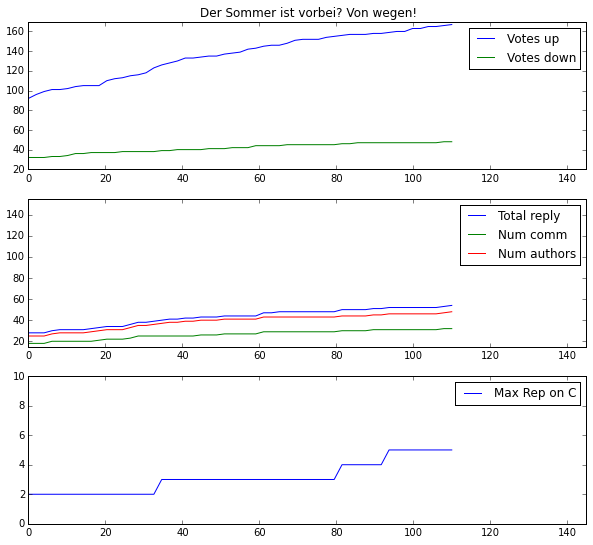

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import json
from pprint import pprint


def assimilate_time_series(data):
    print data[0].keys()
    out = {}
    for k in data[0].keys():
        out[k]=[]
    
    for capture in data:
        for k in capture.keys():
            out[k].append(capture[k])
    return out

with open('save_res.json') as data_file:    
    data_json = json.load(data_file)

pdata=assimilate_time_series(data_json)    
N = len(pdata['max_up_votes'])

#pprint(assimilate_time_series(data_json))
x = np.linspace(0, N*2, N)
fig = plt.figure(figsize=(10, 9))

plt.subplot(3, 1, 1)
plt.axis([0, 2*N+35, 20,170])
plt.plot(x, pdata['max_up_votes'],label='Votes up')
plt.plot(x, pdata['max_down_votes'],label='Votes down')
stitle = pdata['storyTitle']
plt.title(stitle[0]);
plt.legend()

plt.subplot(3, 1, 2)
plt.axis([0, 2*N+35, 15,155])
plt.plot(x, pdata['tot_repbly'],label='Total reply')
plt.plot(x, pdata['num_comments'],label='Num comm')
plt.plot(x, pdata['num_authors'],label='Num authors')
plt.legend()

plt.subplot(3, 1, 3)
plt.axis([0, 2*N+35, 0,10])
plt.plot(x, pdata['max_reply_on_comment'],label='Max Rep on C')
plt.legend()

plt.show()